# Visualize Nuclei Crop Distribution

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Find the root of the git repo on the host system

In [2]:
# Get the current working directory
cwd = pathlib.Path.cwd()

if (cwd / ".git").is_dir():
    root_dir = cwd

else:
    root_dir = None
    for parent in cwd.parents:
        if (parent / ".git").is_dir():
            root_dir = parent
            break

# Check if a Git root directory was found
if root_dir is None:
    raise FileNotFoundError("No Git root directory found.")

# Inputs

In [3]:
crop_dimensions_data_paths = list(
    (root_dir / "big_drive/nuclei_crop_dimensions_jump")
    .resolve(strict=True)
    .rglob("*.parquet")
)
cropdimdf = pd.concat(
    [pd.read_parquet(platecropdf) for platecropdf in crop_dimensions_data_paths], axis=0
)

# Outputs

In [4]:
nuclei_crop_figure_path = pathlib.Path("nuclei_crop_distribution_figure")
nuclei_crop_figure_path.mkdir(parents=True, exist_ok=True)

# Plot Sample Distribution of Nuclei Crops

/tmp/ipykernel_992665/2938778034.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  g.ax_joint.legend(fontsize=12)


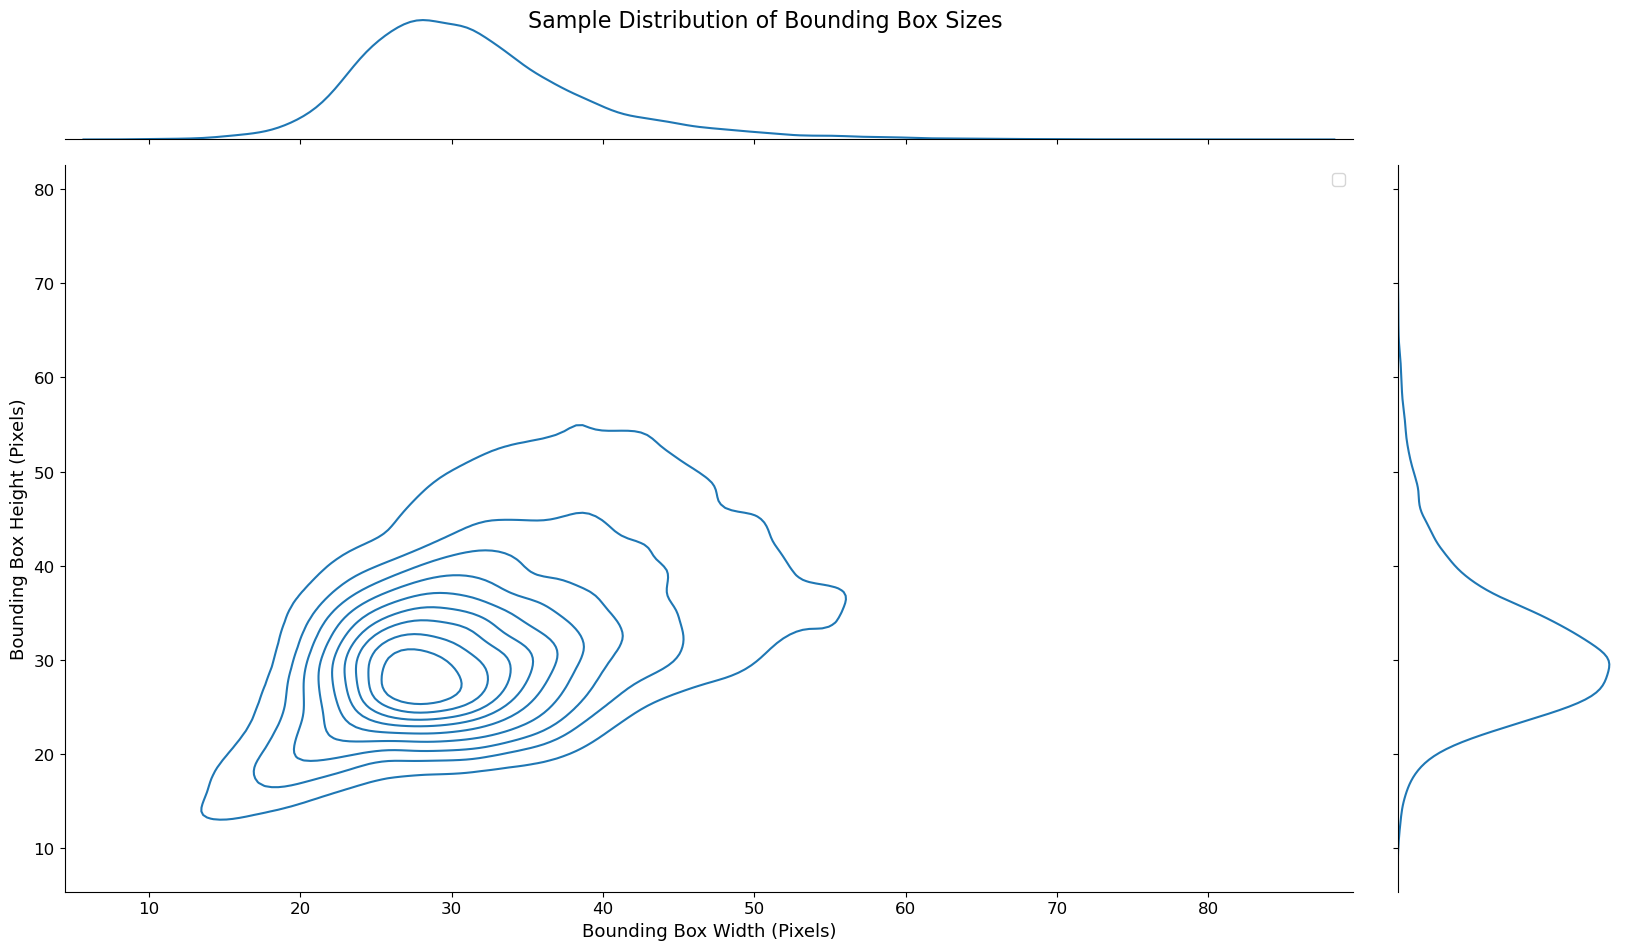

In [5]:
g = sns.jointplot(
    data=cropdimdf.sample(n=15_000, random_state=0),
    x="Nuclei_AreaShape_BoundingBoxDelta_X",
    y="Nuclei_AreaShape_BoundingBoxDelta_Y",
    kind="kde",
)
g.fig.set_size_inches(18, 10)
g.set_axis_labels(
    "Bounding Box Width (Pixels)", "Bounding Box Height (Pixels)", fontsize=13
)
g.fig.suptitle("Sample Distribution of Bounding Box Sizes", fontsize=16)

g.ax_joint.tick_params(axis="x", labelsize=12)
g.ax_joint.tick_params(axis="y", labelsize=12)
g.ax_joint.legend(fontsize=12)

plt.savefig(nuclei_crop_figure_path / "nuclei_crop_distributions.png")
plt.show()